PRUNING FILTERS FOR EFFICIENT CONVNETS发表于2017年，属于结构化剪枝的一种，能够减少模型参数，减少模型推理计算量。根据filter的权重绝对值之和来评估filter的重要性，从而实现剪枝。

文章观点：<br/>
1)降低模型参数量并不等于减少整体的FLOP,如VGG的全连接层占据90%的参数量，但只贡献不到1%的FLOP。<br/>
2)一些conv层剪枝方法需要sparse BLAS库，BLAS是矩阵与向量计算的标准。

剪枝的依据是filter（如某层有128个卷积核，每个卷积核的维度为64x3x3，则64x3x3的卷积核为一个filter）的权重绝对值之和（文中的L1 norm指的就是这个）。VGG各层的权重绝对值之和分布如下：
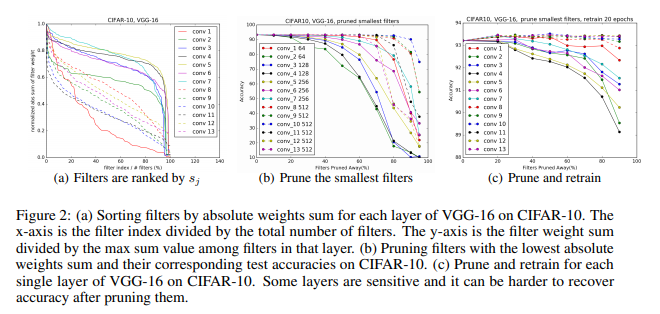

剪枝的流程如下：
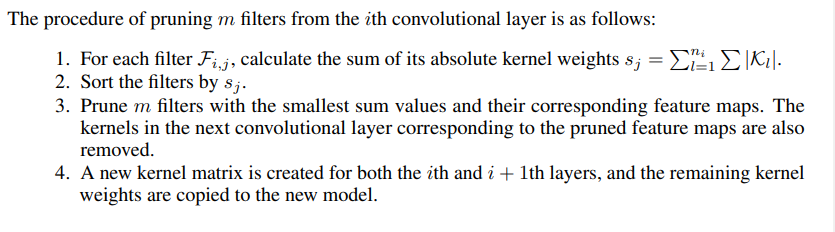

layer's sensitivity:<br/>
由图二可见，不同层对剪枝的敏感度是不一样的。图(a)中有些层曲线的斜率较大（如图(a)红线），这些层对剪枝不太敏感，相反，斜率较小的曲线较敏感(如图中绿色曲线)

多层剪枝:<br/>
多层剪枝有两种策略：<br/>
1)Independent pruning:各层独立剪枝，在计算权重和的时候不考虑前一层的剪枝结果；<br/>
2)Greedy pruning:在剪枝时考虑前一层的剪枝结果。<br/>
$如下图，X_{i+1}的蓝色通道被裁剪，相应的，下一层卷积核的相应维度(蓝色行)应该被裁剪。在裁剪下一层卷积的filter，计算权重和的时候（即计算绿色列），Independent pruning加上图中的黄色权重，而Greedy pruning不加。$
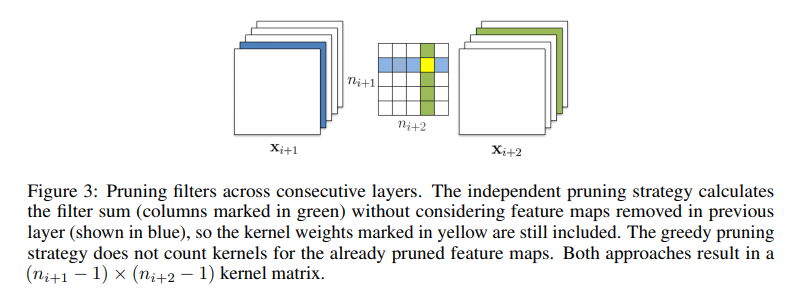

在裁剪完filter后，为了补偿精度损失，需要对裁剪后的模型进行重新训练。本文用了一次裁剪、一次重训练的方式。